<a href="https://colab.research.google.com/github/KrischelleJoyner/DataSciencePortfolio/blob/main/KrischelleJoyner/DataSciencePortfolio/Python/NeuralNetworks/Convolutional%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem 1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


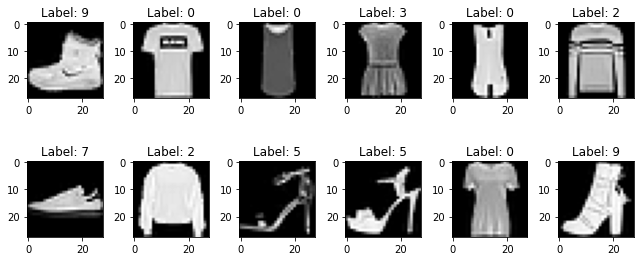

In [ ]:
# specify the number of rows and columns you want to see
num_row = 2
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

train_images = X_train.reshape((X_train.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255.0

test_images = X_test.reshape((X_test.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(Y_train)
test_labels = to_categorical(Y_test)

print('Train images shape:', train_images.shape, 'Test images shape:', test_images.shape, 'Train label shape:', train_labels.shape, 'Test label shape:', test_labels.shape)

Train images shape: (60000, 28, 28, 1) Test images shape: (10000, 28, 28, 1) Train label shape: (60000, 10) Test label shape: (10000, 10)


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=0)

No handles with labels found to put in legend.


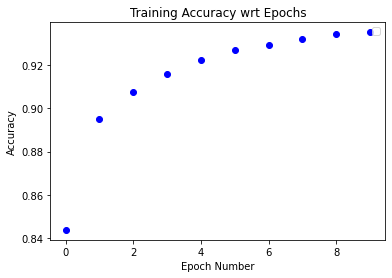

In [ ]:
acc = history.history['accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')
plt.title('Training Accuracy wrt Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2976 - accuracy: 0.9000


In [ ]:
print('Test Loss:', test_loss, 'Test Accuracy:', test_acc)

Test Loss: 0.29761803150177 Test Accuracy: 0.8999999761581421


In [ ]:
# Problem 2
from keras import optimizers
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print('CIFAR-10 Dataset Shape:')
print('train_images_2: ' + str(train_images_2.shape))
print('train_labels_2: ' + str(train_labels_2.shape))
print('test_images_2:  '  + str(test_images_2.shape))
print('test_labels_2:  '  + str(test_labels_2.shape))

CIFAR-10 Dataset Shape:
train_images_2: (50000, 32, 32, 3)
train_labels_2: (50000, 1)
test_images_2:  (10000, 32, 32, 3)
test_labels_2:  (10000, 1)


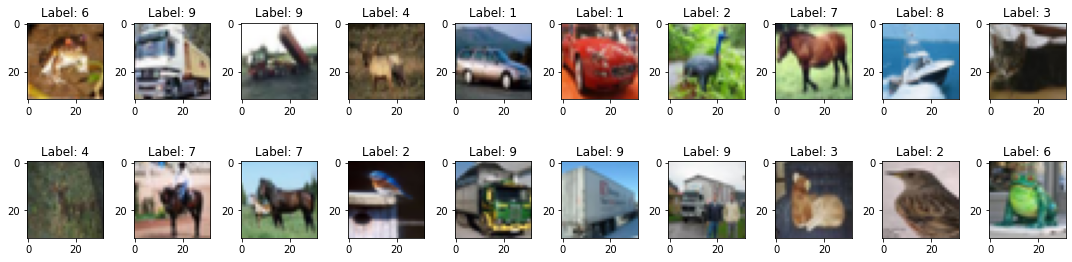

In [ ]:
num_row = 2
num_col = 10

# get a segment of the dataset
num = num_row*num_col
images = train_images_2[:num]
labels = train_labels_2[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
train_labels_2 = train_labels_2.reshape(50000,)
test_labels_2 = test_labels_2.reshape(10000,)

train_label_bool_ge5 = train_labels_2 >= 5
train_label_bool_lt5 = train_labels_2 < 5

test_label_bool_ge5 = test_labels_2 >= 5
test_label_bool_lt5 = test_labels_2 < 5

In [ ]:
train_images_ge5 = train_images_2[train_label_bool_ge5]
train_label_ge5 = train_labels_2[train_label_bool_ge5]

test_images_ge5 = test_images_2[test_label_bool_ge5]
test_label_ge5 = test_labels_2[test_label_bool_ge5]

train_images_lt5 = train_images_2[train_label_bool_lt5]
train_label_lt5 = train_labels_2[train_label_bool_lt5]

test_images_lt5 = test_images_2[test_label_bool_lt5]
test_label_lt5 = test_labels_2[test_label_bool_lt5]

print('train_images_ge5:', train_images_ge5.shape, 'train_label_ge5:', train_label_ge5.shape)
print('test_images_ge5:', test_images_ge5.shape, 'test_label_ge5:', test_label_ge5.shape)
print('train_images_lt5:', train_images_lt5.shape, 'train_label_lt5:', train_label_lt5.shape)
print('test_images_lt5:', test_images_lt5.shape, 'test_label_lt5:', test_label_lt5.shape)

train_images_ge5: (25000, 32, 32, 3) train_label_ge5: (25000,)
test_images_ge5: (5000, 32, 32, 3) test_label_ge5: (5000,)
train_images_lt5: (25000, 32, 32, 3) train_label_lt5: (25000,)
test_images_lt5: (5000, 32, 32, 3) test_label_lt5: (5000,)


In [ ]:
train_label_ge5 = train_label_ge5 - 5
test_label_ge5 = test_label_ge5 - 5
train_label_ge5 = to_categorical(train_label_ge5)
test_label_ge5 = to_categorical(test_label_ge5)
train_label_lt5 = to_categorical(train_label_lt5)
test_label_lt5 = to_categorical(test_label_lt5)

In [ ]:
train_images_lt5 = train_images_lt5.astype('float32')/255.0
train_images_ge5 = train_images_ge5.astype('float32')/255.0
test_images_lt5 = test_images_lt5.astype('float32')/255.0
test_images_ge5 = test_images_ge5.astype('float32')/255.0

In [ ]:
train_images_lt5.shape, train_label_lt5.shape, test_images_lt5.shape, test_label_lt5.shape

((25000, 32, 32, 3), (25000, 5), (5000, 32, 32, 3), (5000, 5))

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(5, activation='softmax'))
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1605760   
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
model_1.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_1.fit(train_images_lt5, train_label_lt5, epochs = 20, batch_size=128, verbose=0)

No handles with labels found to put in legend.


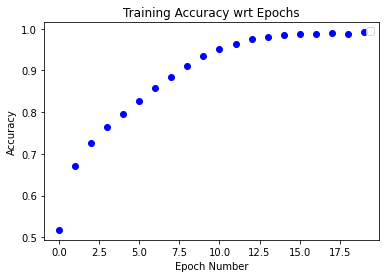

In [ ]:
acc = history.history['accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.title('Training Accuracy wrt Epochs')
plt.legend()
plt.show()

In [ ]:
model_1.evaluate(test_images_lt5, test_label_lt5)

157/157 [==============================] - 1s 5ms/step - loss: 1.8360 - accuracy: 0.7454


[1.8360148668289185, 0.7454000115394592]

In [ ]:
from tensorflow import keras

model_2 = keras.models.clone_model(model_1)

for layer in model_2.layers[:-2]:
  layer.trainable = False

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1605760   
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
model_2.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model_2.fit(train_images_ge5, train_label_ge5, epochs = 20, batch_size=128, verbose=0)

No handles with labels found to put in legend.


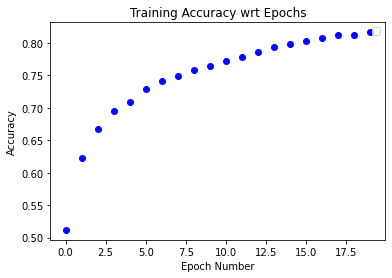

In [ ]:
acc2 = history2.history['accuracy']
epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo')
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.title('Training Accuracy wrt Epochs')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images_ge5, test_label_ge5)

157/157 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.7378


In [ ]:
print('Test Loss:', test_loss, 'Test Accuracy:', test_acc)

Test Loss: 0.693318784236908 Test Accuracy: 0.7378000020980835
